In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
def get_coeff(x, f_x):
    n = len(x)
    div_diff = np.zeros((n, n))

    div_diff[:, 0] += f_x.T

    for j in range(1, n):
        for i in range(j, n):
            div_diff[i][j] = (div_diff[i][j - 1] - div_diff[i - 1][j - 1]) / (
                x[i] - x[i - 1]
            )

    return np.array([div_diff[i][i] for i in range(n)])

In [3]:
def get_poly_val(coeff, target_x, x):
    n = len(coeff)
    est_value = coeff[0]
    product = 1
    for i in range(1, n):
        product *= target_x - x[i - 1]
        term = coeff[i] * product / math.factorial(i)
        est_value += term

    return est_value

In [4]:
def get_poly_multiple(X, coeff, x):
    res = np.zeros(X.shape) + coeff[0]
    product = np.ones(X.shape)

    for i in range(1, len(coeff)):
        product *= X - x[i - 1]
        term = coeff[i] * product / math.factorial(i)
        res += term

    return res

In [5]:
x = np.array([1, 2, 3])
f_x = np.array([2, 3, 5])

target_x = 2.51
coeff = get_coeff(x, f_x)
est_value = get_poly_val(coeff, target_x, x)

print(coeff)

[2. 1. 1.]


In [6]:
print("Exact Value of f(4.5) =", 71.375)
print("Estimated Value of f(4.5) =", est_value)
print("Error in estimation =", np.abs(est_value - 71.375))

Exact Value of f(4.5) = 71.375
Estimated Value of f(4.5) = 3.8950499999999995
Error in estimation = 67.47995


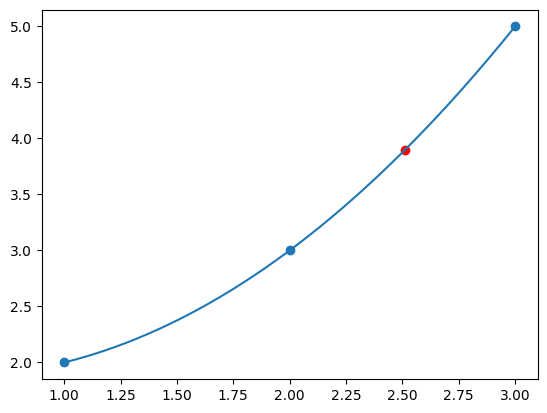

In [7]:
X = np.linspace(x[0], x[-1], 10_000)
plt.plot(X, get_poly_multiple(X, coeff, x))
plt.scatter(x, f_x)
plt.scatter(target_x, est_value, c="red")
plt.show()

In [12]:
n  = 5
div_diff = np.random.randint(1, 10, (n, n))
x = [1, 2, 3]
n_new = n + len(x)
new_div_diff = np.zeros((n_new, n_new))

new_div_diff[:n, :n] += div_diff
div_diff

array([[7, 7, 5, 1, 3],
       [4, 1, 7, 3, 7],
       [8, 7, 7, 8, 5],
       [4, 3, 5, 1, 4],
       [7, 9, 8, 4, 4]])

In [13]:
new_div_diff

array([[7., 7., 5., 1., 3., 0., 0., 0.],
       [4., 1., 7., 3., 7., 0., 0., 0.],
       [8., 7., 7., 8., 5., 0., 0., 0.],
       [4., 3., 5., 1., 4., 0., 0., 0.],
       [7., 9., 8., 4., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
div_diff = np.append(div_diff, np.zeros((len(x), n)), 0)
div_diff = np.append(div_diff, np.zeros((n + len(x), len(x))), 1)
div_diff

array([[7., 7., 5., 1., 3., 0., 0., 0.],
       [4., 1., 7., 3., 7., 0., 0., 0.],
       [8., 7., 7., 8., 5., 0., 0., 0.],
       [4., 3., 5., 1., 4., 0., 0., 0.],
       [7., 9., 8., 4., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
new_div_diff

array([[3., 3., 5., 8., 7., 0., 0., 0.],
       [3., 6., 5., 9., 6., 0., 0., 0.],
       [5., 7., 2., 9., 8., 0., 0., 0.],
       [3., 3., 3., 3., 9., 0., 0., 0.],
       [5., 7., 9., 4., 6., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
x = np.array([1, 2, 3, 4, 5, 6])
f_x = np.array([14.5, 19.5, 30.5, 53.5, 94.5, 159.5])

x_new = [7, 8]
f_x_new = [180.5, 219.5]

x = np.append(x, np.array(x_new), 0)
f_x = np.append(f_x, np.array(f_x_new), 0)